--- 
title: "ISLR Chp 2 - Python"  
date: 2019-08-05
description: "Python implementation of the code in ISLR" 
draft: false 
tags:
- python
---

In [92]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px

# Advertising

Simple example of advertising spend in tv/radio/newspapers and sales for 200 markets.

In [27]:
df = pd.read_csv("../data/Advertising.csv")
df = df.rename(columns={df.columns[0]: "Markets"})

df.head(2)

,Markets,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


Lets take a look at the each of the advertising budgets with a simple regression line plotted:

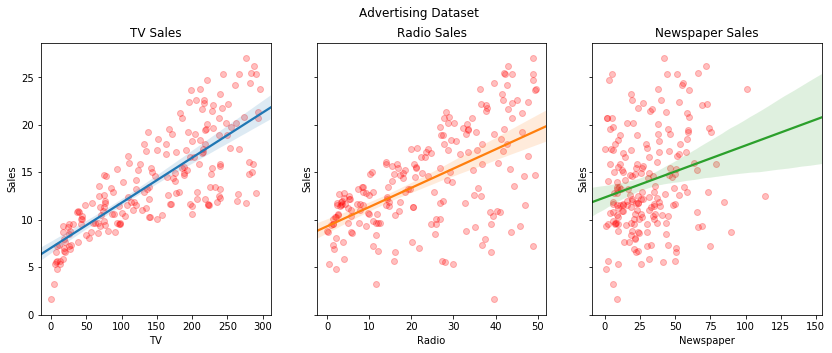

In [41]:
fig, axes = plt.subplots(1,3, figsize=(14,5), sharey=True)
fig.suptitle("Advertising Dataset")

for ax, col in zip(axes, df.columns[1:4]):
    ax.set_title(f"{col} Sales")
    sns.regplot(x=col, y="Sales", order=1, data=df, ax=ax, 
                scatter_kws={'alpha':0.25, "color": "red"})

# Income dataset

In [90]:
df = pd.read_csv("../data/Income1.csv")
df.head(3)

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410


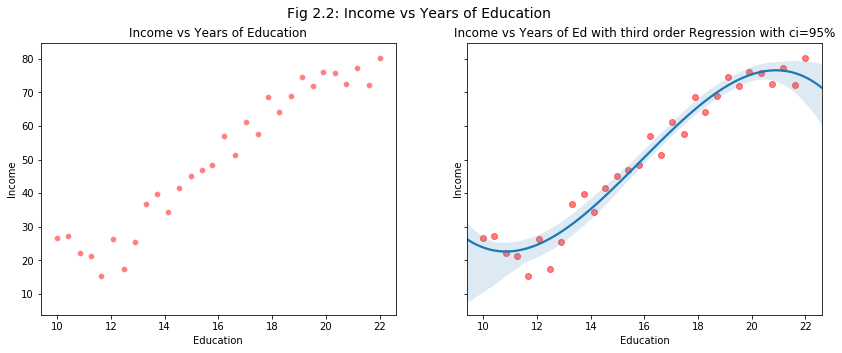

In [84]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,5), sharey=True)
fig.suptitle("Fig 2.2: Income vs Years of Education", size=14)

ax.set_title("Income vs Years of Education")
sns.scatterplot(x="Education", y="Income", data=df, ax=ax,
                color="red", alpha=0.5)

ax1.set_title("Income vs Years of Ed with third order Regression with ci=95%")

sns.regplot(x="Education", y="Income", order=3, ci=95, data=df, ax=ax1, 
            scatter_kws={'alpha':0.5, "color": "red"});

Each actual point is either above or below the predicted income value based on our regression line, but the cumalative error should be approx zero.

## Fig 2.3

In [97]:
df = pd.read_csv("../data/Income2.csv")
df.head(3)

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727


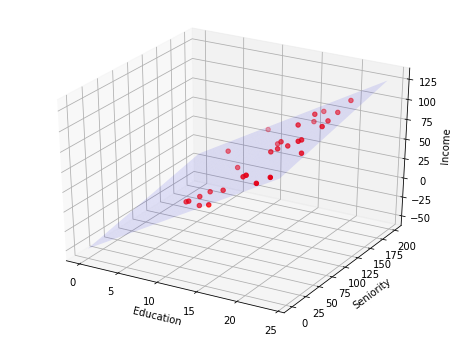

In [280]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

reg = linear_model.LinearRegression()

xs = df.Education
ys = df.Seniority
zs = df.Income

data = np.column_stack((xs, ys))
reg.fit(data, y=zs)

# we need a mesh for every possible income point we predict
X, Y = np.meshgrid(np.arange(0,25), np.arange(0,200), indexing='xy')

Z = X * reg.coef_[0] + Y * reg.coef_[1] + reg.intercept_

# plot 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y, Z, alpha=0.1, color="blue")

ax.set_xlabel("Education")
ax.set_ylabel("Seniority")
ax.set_zlabel("Income")

ax.scatter(xs, ys, zs, color="red");

todo: make higher order regression plane

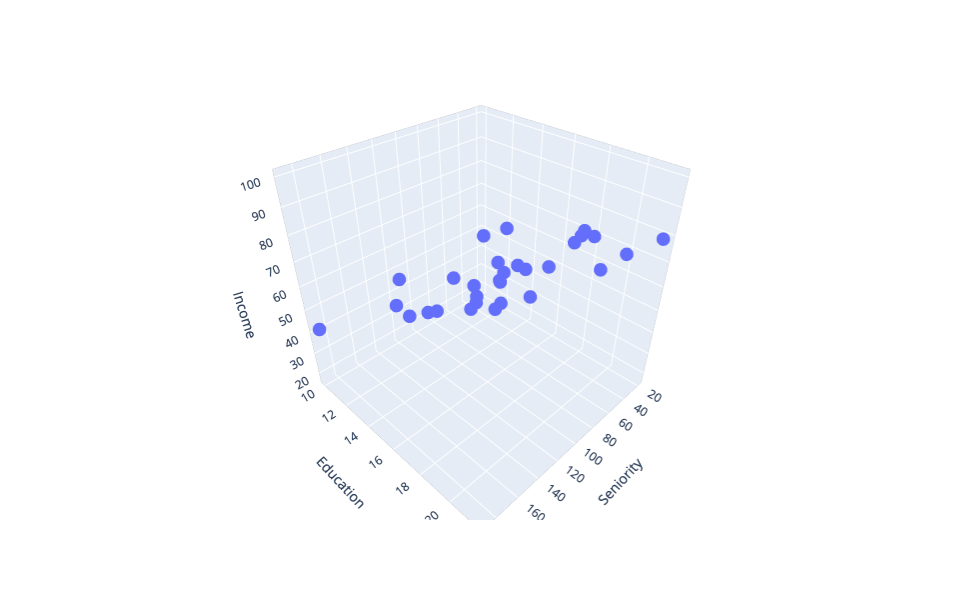

In [289]:
px.scatter_3d(df, y="Education", x="Seniority", z="Income")

## Clustering

The below chart shows us how clusters with three types of things with two features each can look:

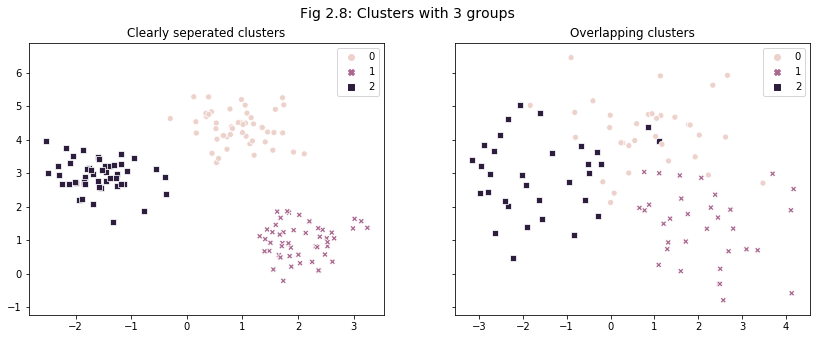

In [348]:
from sklearn.datasets.samples_generator import make_blobs

fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,5), sharey=True)
fig.suptitle("Fig 2.8: Clusters with 3 groups", size=14)

ax.set_title("Clearly seperated clusters")
X, color = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.5, random_state=0)
sns.scatterplot(X[:,0], X[:,1], hue=color, style=color, ax=ax)

ax1.set_title("Overlapping clusters")
X, color = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1.1, random_state=0)
sns.scatterplot(X[:,0], X[:,1], hue=color, style=color, ax=ax1);

## 2.2 Model Accuracy

No one method dominates, so we need to compare model accuracy.

### 2.2.1 measuring quality of fit

For regression models, the most common measure is the MSE.

Say we have a simple data set like the below and we want to find a regression line which explains it (assuming we don't know how f(x) works.


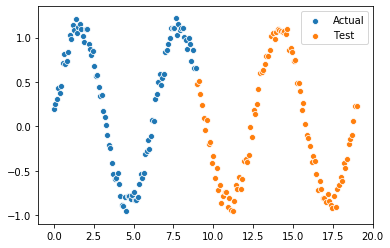

In [817]:
x = np.linspace(0, 9, 100)
x_test = np.linspace(9, 19, 100)

def f(x):
    return np.sin(x) + np.random.random(100) / 4

y = f(x)
y_test = f(x_test)

sns.scatterplot(x,y, label="Actual")
sns.scatterplot(x_test, y_test, label="Test")

We have the data, now to try and fit different regression lines to this using numpy.

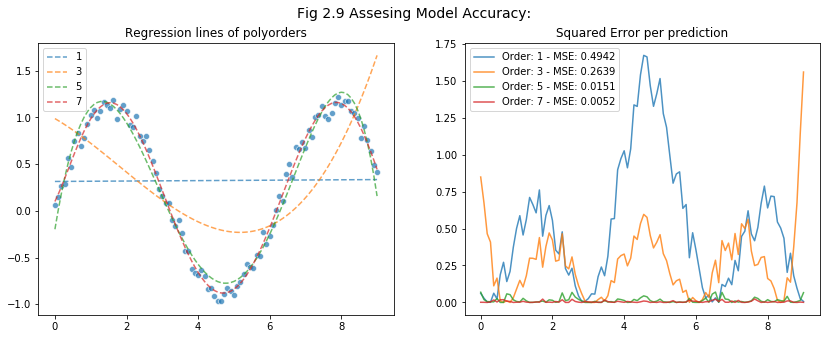

In [810]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,5))
fig.suptitle("Fig 2.9 Assesing Model Accuracy: ", size=14)

ax.set_title("Regression lines of polyorders")

sns.scatterplot(x,y, ax=ax, alpha=0.7)

for order in np.arange(1,9,2):
    z = np.polyfit(x, y, order)
    p = np.poly1d(z)
    preds = p(x)
    ax.plot(x, preds, label=f"{order}", alpha=0.7, ls="--")
    errors = np.square(y - preds)
    
    ax1.plot(x, errors, alpha=0.8, label=f"Order: {order} - MSE: {np.mean(errors):.4f}")

#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc="center right", fontsize=13)
ax.legend()
ax1.legend()

ax1.set_title("Squared Error per prediction");

We can see above that a regression line of order 6 is pretty close to fitting and order 7 is bang on. This is visible in the squared error plot, where the order 7 is close to zero and order 5 just above.

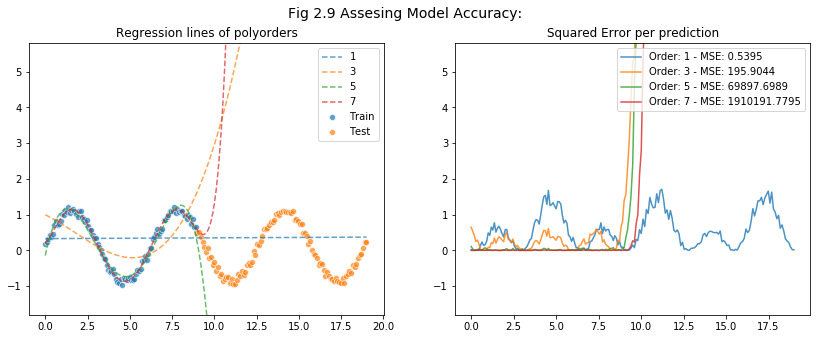

In [832]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,5))
fig.suptitle("Fig 2.9 Assesing Model Accuracy: ", size=14)

ax.set_title("Regression lines of polyorders")

x_all = np.append(x, x_test)
y_all = np.append(y, y_test)

sns.scatterplot(x, y, ax=ax, alpha=0.7, label="Train")
sns.scatterplot(x_test, y_test, ax=ax, alpha=0.7, label="Test")

for order in np.arange(1,9,2):
    z = np.polyfit(x, y, order)
    p = np.poly1d(z)
    preds = p(x_all)
    ax.plot(x_all, preds, label=f"{order}", alpha=0.7, ls="--")
    errors = np.square(y_all - preds)
    
    ax1.plot(x_all, errors, alpha=0.8, label=f"Order: {order} - MSE: {np.mean(errors):.4f}")

#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc="center right", fontsize=13)
for ax in [ax, ax1]:
    ax.legend()
    ax.set_ylim(-1.8, 5.8)

ax1.set_title("Squared Error per prediction");

The above beautifully illustrates under and over fitting.

### 2.2.2 Bias Variance tradeoff

Variance is the amount f changes if we use a different training set. Ideally changing the training set shouldn't lead to a big change in f. If our estimated f has high variance, than small changes in training data will result to large changes in f.

Bias is the error. Using linear regression to estimate a non-linear function will lead to high bias.

As we use more flexible methords, variance increases and bias decrease.

> Good test set performance of a statistical learning method re- quires low variance as well as low squared bias. This is referred to as a trade-off because it is easy to obtain a method with extremely low bias but high variance (for instance, by drawing a curve that passes through every single training observation) or a method with very low variance but high bias (by fitting a horizontal line to the data). The challenge lies in finding a method for which both the variance and the squared bias are low.

### 2.2.3 Classification

Here it makes sense to just use the error rate - what % of predicted classes are correct?

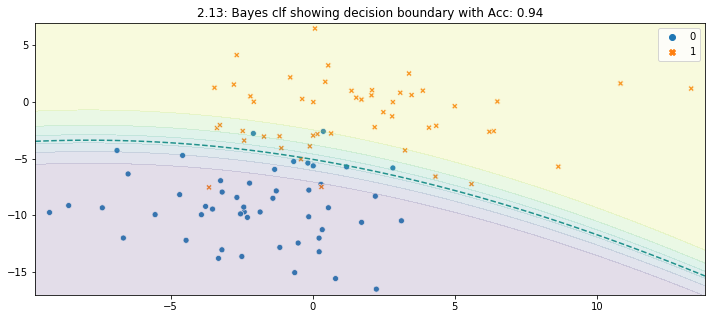

In [920]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

fig, ax = plt.subplots(1,1, figsize=(12,5))

# training points
X, y = make_blobs(100, n_features=2, centers=2, random_state=2, cluster_std=3)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, alpha=0.9, style=y, ax=ax)

# classifier
clf = GaussianNB()
clf.fit(X, y)

# plot decision boundary by first make the mesh
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

# then predict a prob for every point in the mesh
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, alpha=1, levels=1, linewidths=1.5, linestyles="--")
ax.contourf(xx, yy, Z, alpha=.15)

ax.set_title(f"2.13: Bayes clf showing decision boundary with Acc: {clf.score(X, y)}");

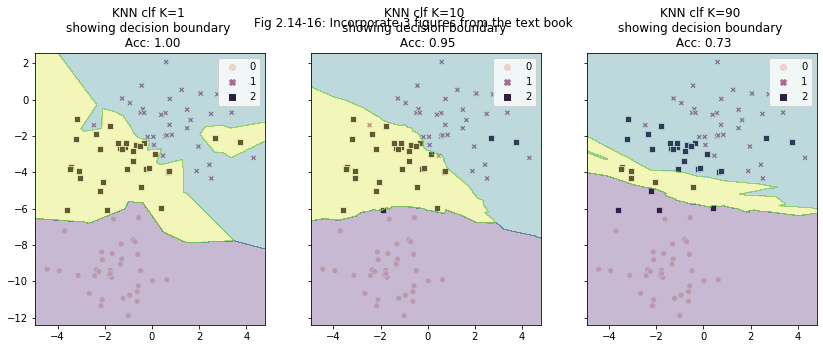

In [977]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1,3, figsize=(14,5), sharey=True)
fig.suptitle("Fig 2.14-16: Incorporate 3 figures from the text book")

# training points
X, y = make_blobs(100, n_features=2, centers=3, random_state=2, cluster_std=1.3)

# the mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

for k, ax in zip([1,10,90], axes):
    sns.scatterplot(X[:, 0], X[:, 1], hue=y, alpha=1, style=y, ax=ax)

    # classifier
    clf = KNeighborsClassifier(k)
    clf.fit(X, y)

    # then predict a prob for every point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #ax.contour(xx, yy, Z, alpha=1, linewidths=1.5, linestyles="--")
    ax.contourf(xx, yy, Z, alpha=.3)
    #ax.pcolormesh(xx, yy, Z, alpha=0.1)

    ax.set_title(f"KNN clf K={k} \nshowing decision boundary \n Acc: {clf.score(X, y):.2f}");

# 2.4 Exercises

## 1

1(a): better - we have a large sample size so a small number of predictors should do better than an inflexible method.

1b: worse - we have more predictors than the sample size so it will tend to overfit.

1c: could go either way - a non linear relationship needs a flexible learning method, but in the case of overfitting a simple linear model can work well. But since the relationship is non linear a flexible method should fit better.

1d: inflexible method might work better for a high variance as the flexible method might be overfitting.

## 2

2a: regression problem with n=500, p=3

2b: classification with n=20, p=12, num_classes=2

2c: regression with n=52, p=3

## 3. Bias Variance

> 3a: Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. 

In [982]:
#fig, ax = plt.subplots(1,1, figsize=(14,6))

clf = KNeighborsClassifier()

> 3b: Explain why each of the five curves has the shape displayed in part (a)

training MSE: declines with flexibility as it fits to the data

test MSE: first declines, than increases (typical U shape) as our estimater starts overfitting to the training set as flexibility increases.

squared bias: decreases as flexibility increases

variance: increases with flexibility, see comment about overfitting above. If we are overfitting to the training data, than our function will change a lot as data changes, giving us a high variance.

irreducable error: straightline, we can't estimate better than this, constant which lies below the test MSE. _look this up_

# 4. Real life stats applications

4a: 

4b:

4c: 

# 8. Applied

8a: read in College.csv

In [986]:
df = pd.read_csv("../data/College.csv", index_col=0)
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [988]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


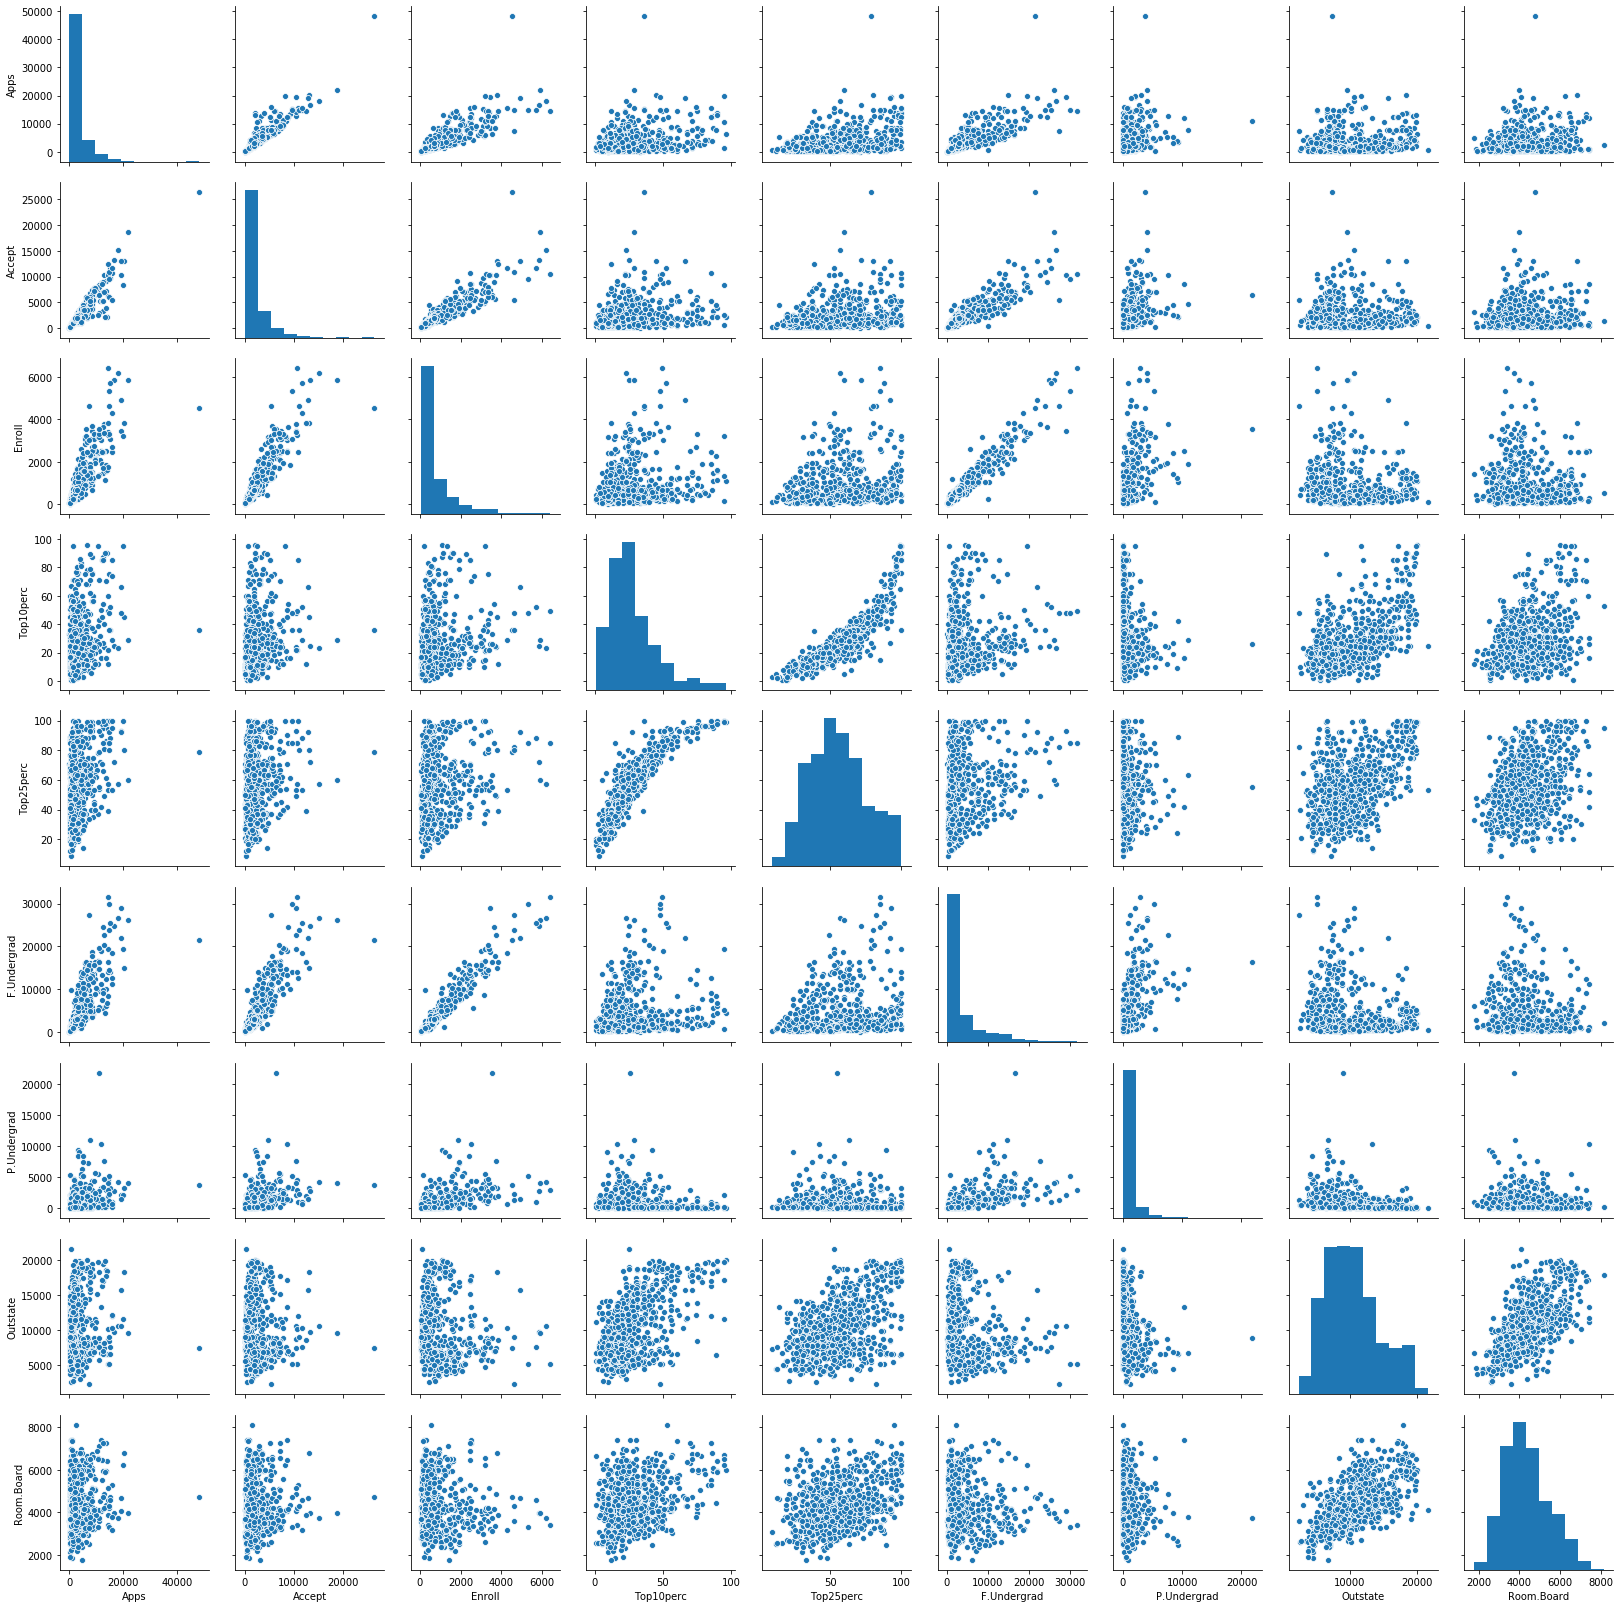

In [993]:
sns.pairplot(df.iloc[:,:10])

8c(iii)

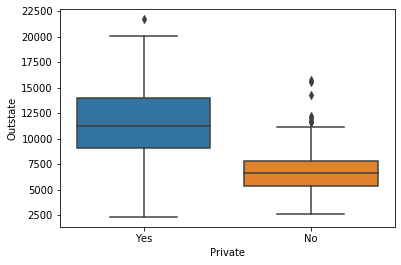

In [997]:
sns.boxplot(x="Private", y="Outstate", data=df);   

In [1025]:
# if needing multiple categories use binning
df["Elite"] = pd.cut(df.Top10perc, bins=[0, 50, np.inf], labels=[False, True])
# else this is simpler for a simple True or False
#df["Elite"] = df.Top10perc > 50
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False


In [1034]:
df["Elite"].value_counts()

False    699
True      78
Name: Elite, dtype: int64

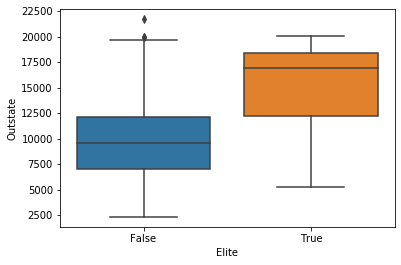

In [1026]:
sns.boxplot(x="Elite", y="Outstate", data=df);   

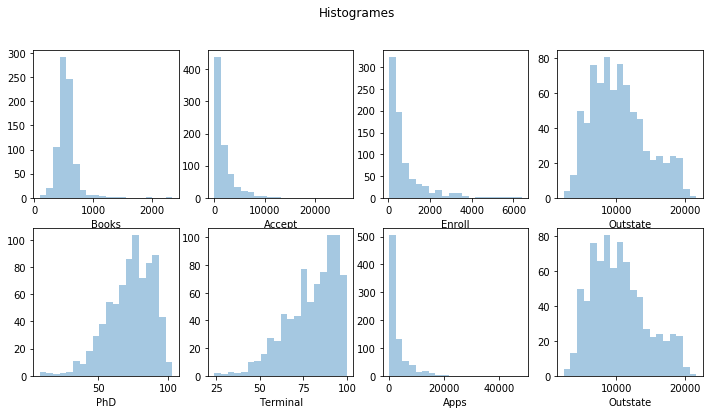

In [1056]:
fig, axes = plt.subplots(2,4, figsize=(12,6), sharey=False)
fig.suptitle("Histogrames")

cols = ["Books", "Accept", "Enroll", "Outstate", "PhD", "Terminal", "Apps", "Outstate"]

for col, ax in zip(cols, axes.flatten()):
    sns.distplot(df[col], kde=False, bins=20, ax=ax)

In [1057]:
df.PhD.describe()

count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64

# 9. Auto data

In [1089]:
df = pd.read_csv("../data/Auto.csv", na_values=["?"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [1096]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [1097]:
df.iloc[10:85].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,75.000000,75.000000,75.000000,74.000000,75.000000,75.000000,75.000000,75.000000
mean,19.680000,5.800000,218.660000,118.364865,3113.893333,14.933333,71.120000,1.480000
std,6.140605,1.852682,118.453297,44.815168,984.139157,2.865608,0.787744,0.741802
min,9.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,14.000000,4.000000,108.500000,87.250000,2244.000000,13.250000,70.500000,1.000000
50%,19.000000,6.000000,199.000000,97.000000,2833.000000,14.500000,71.000000,1.000000
75%,25.000000,8.000000,318.000000,153.000000,4113.500000,16.500000,72.000000,2.000000
max,35.000000,8.000000,455.000000,225.000000,5140.000000,23.500000,72.000000,3.000000


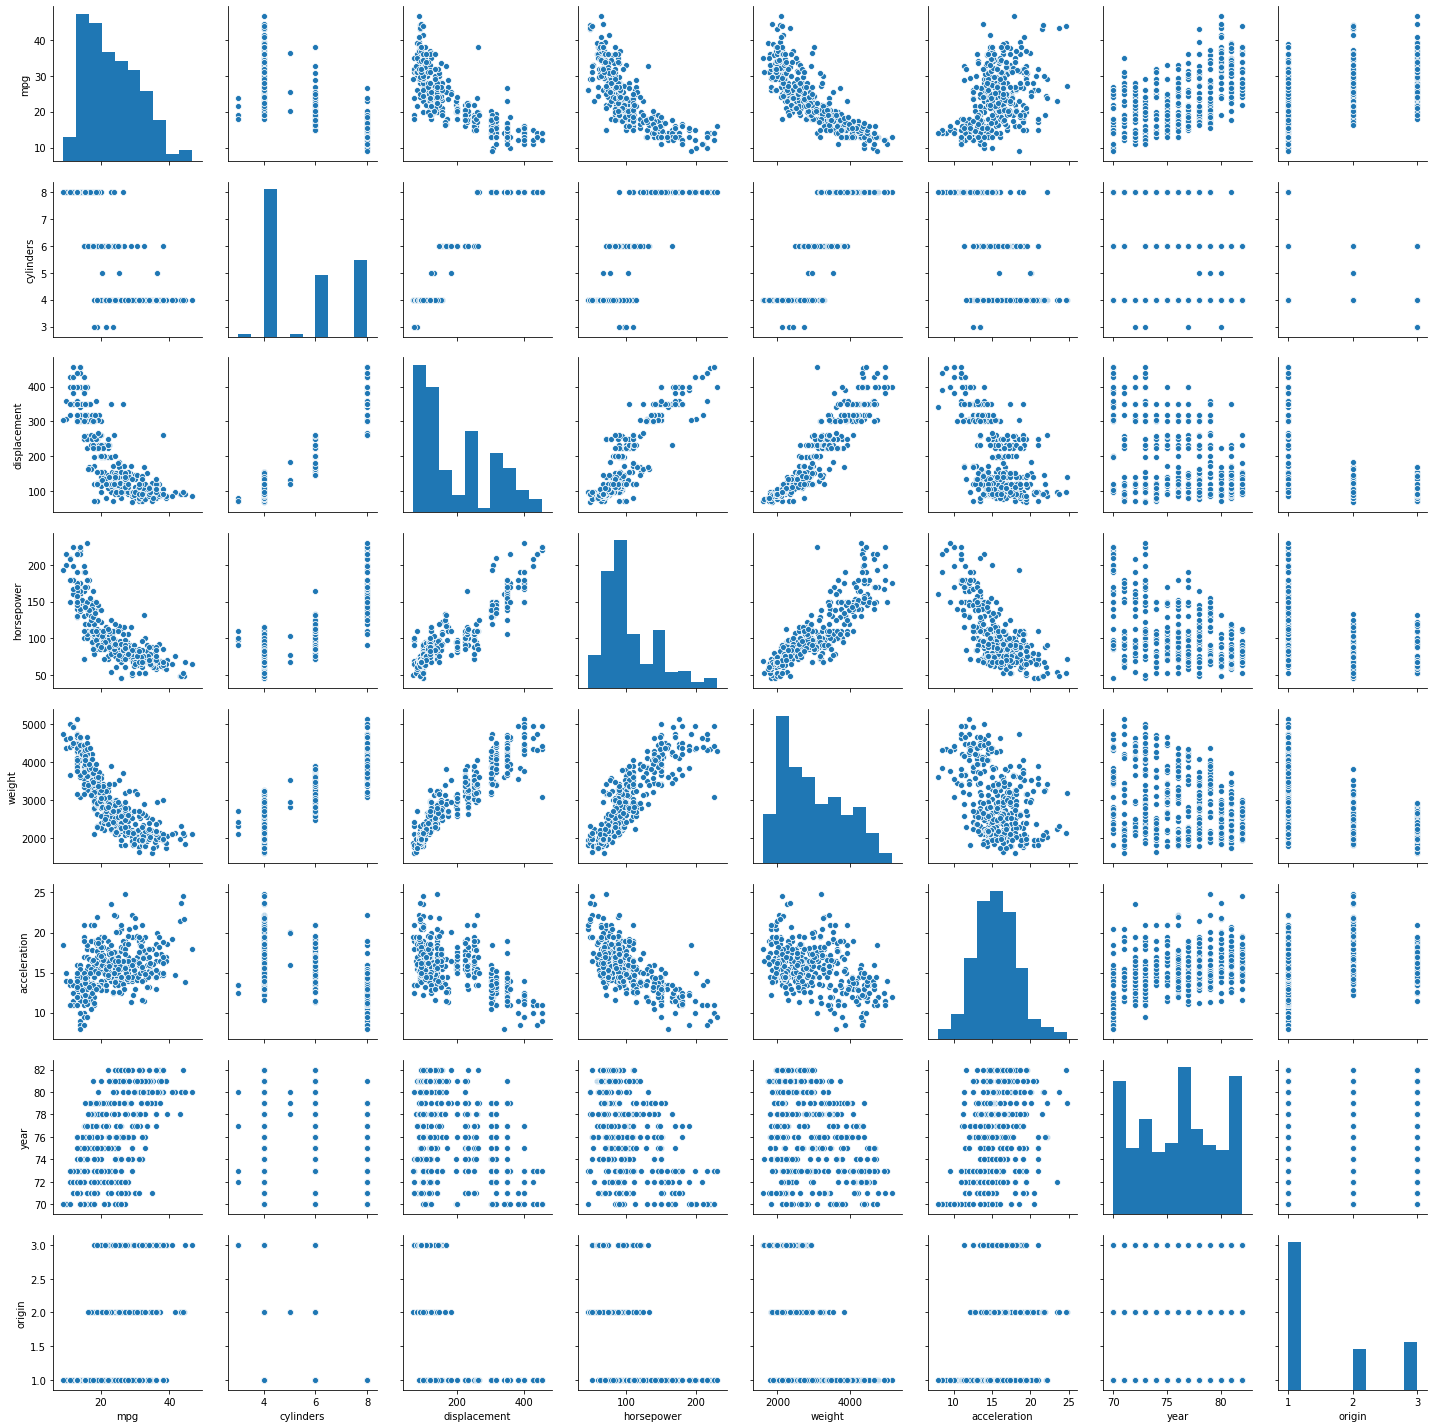

In [1100]:
sns.pairplot(df.dropna());

In [1099]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


# 10. Boston housing data

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per `$10,000`
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in `$1000s`

In [1101]:
df = pd.read_csv("../data/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [1103]:
print(df.shape)
df.describe()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


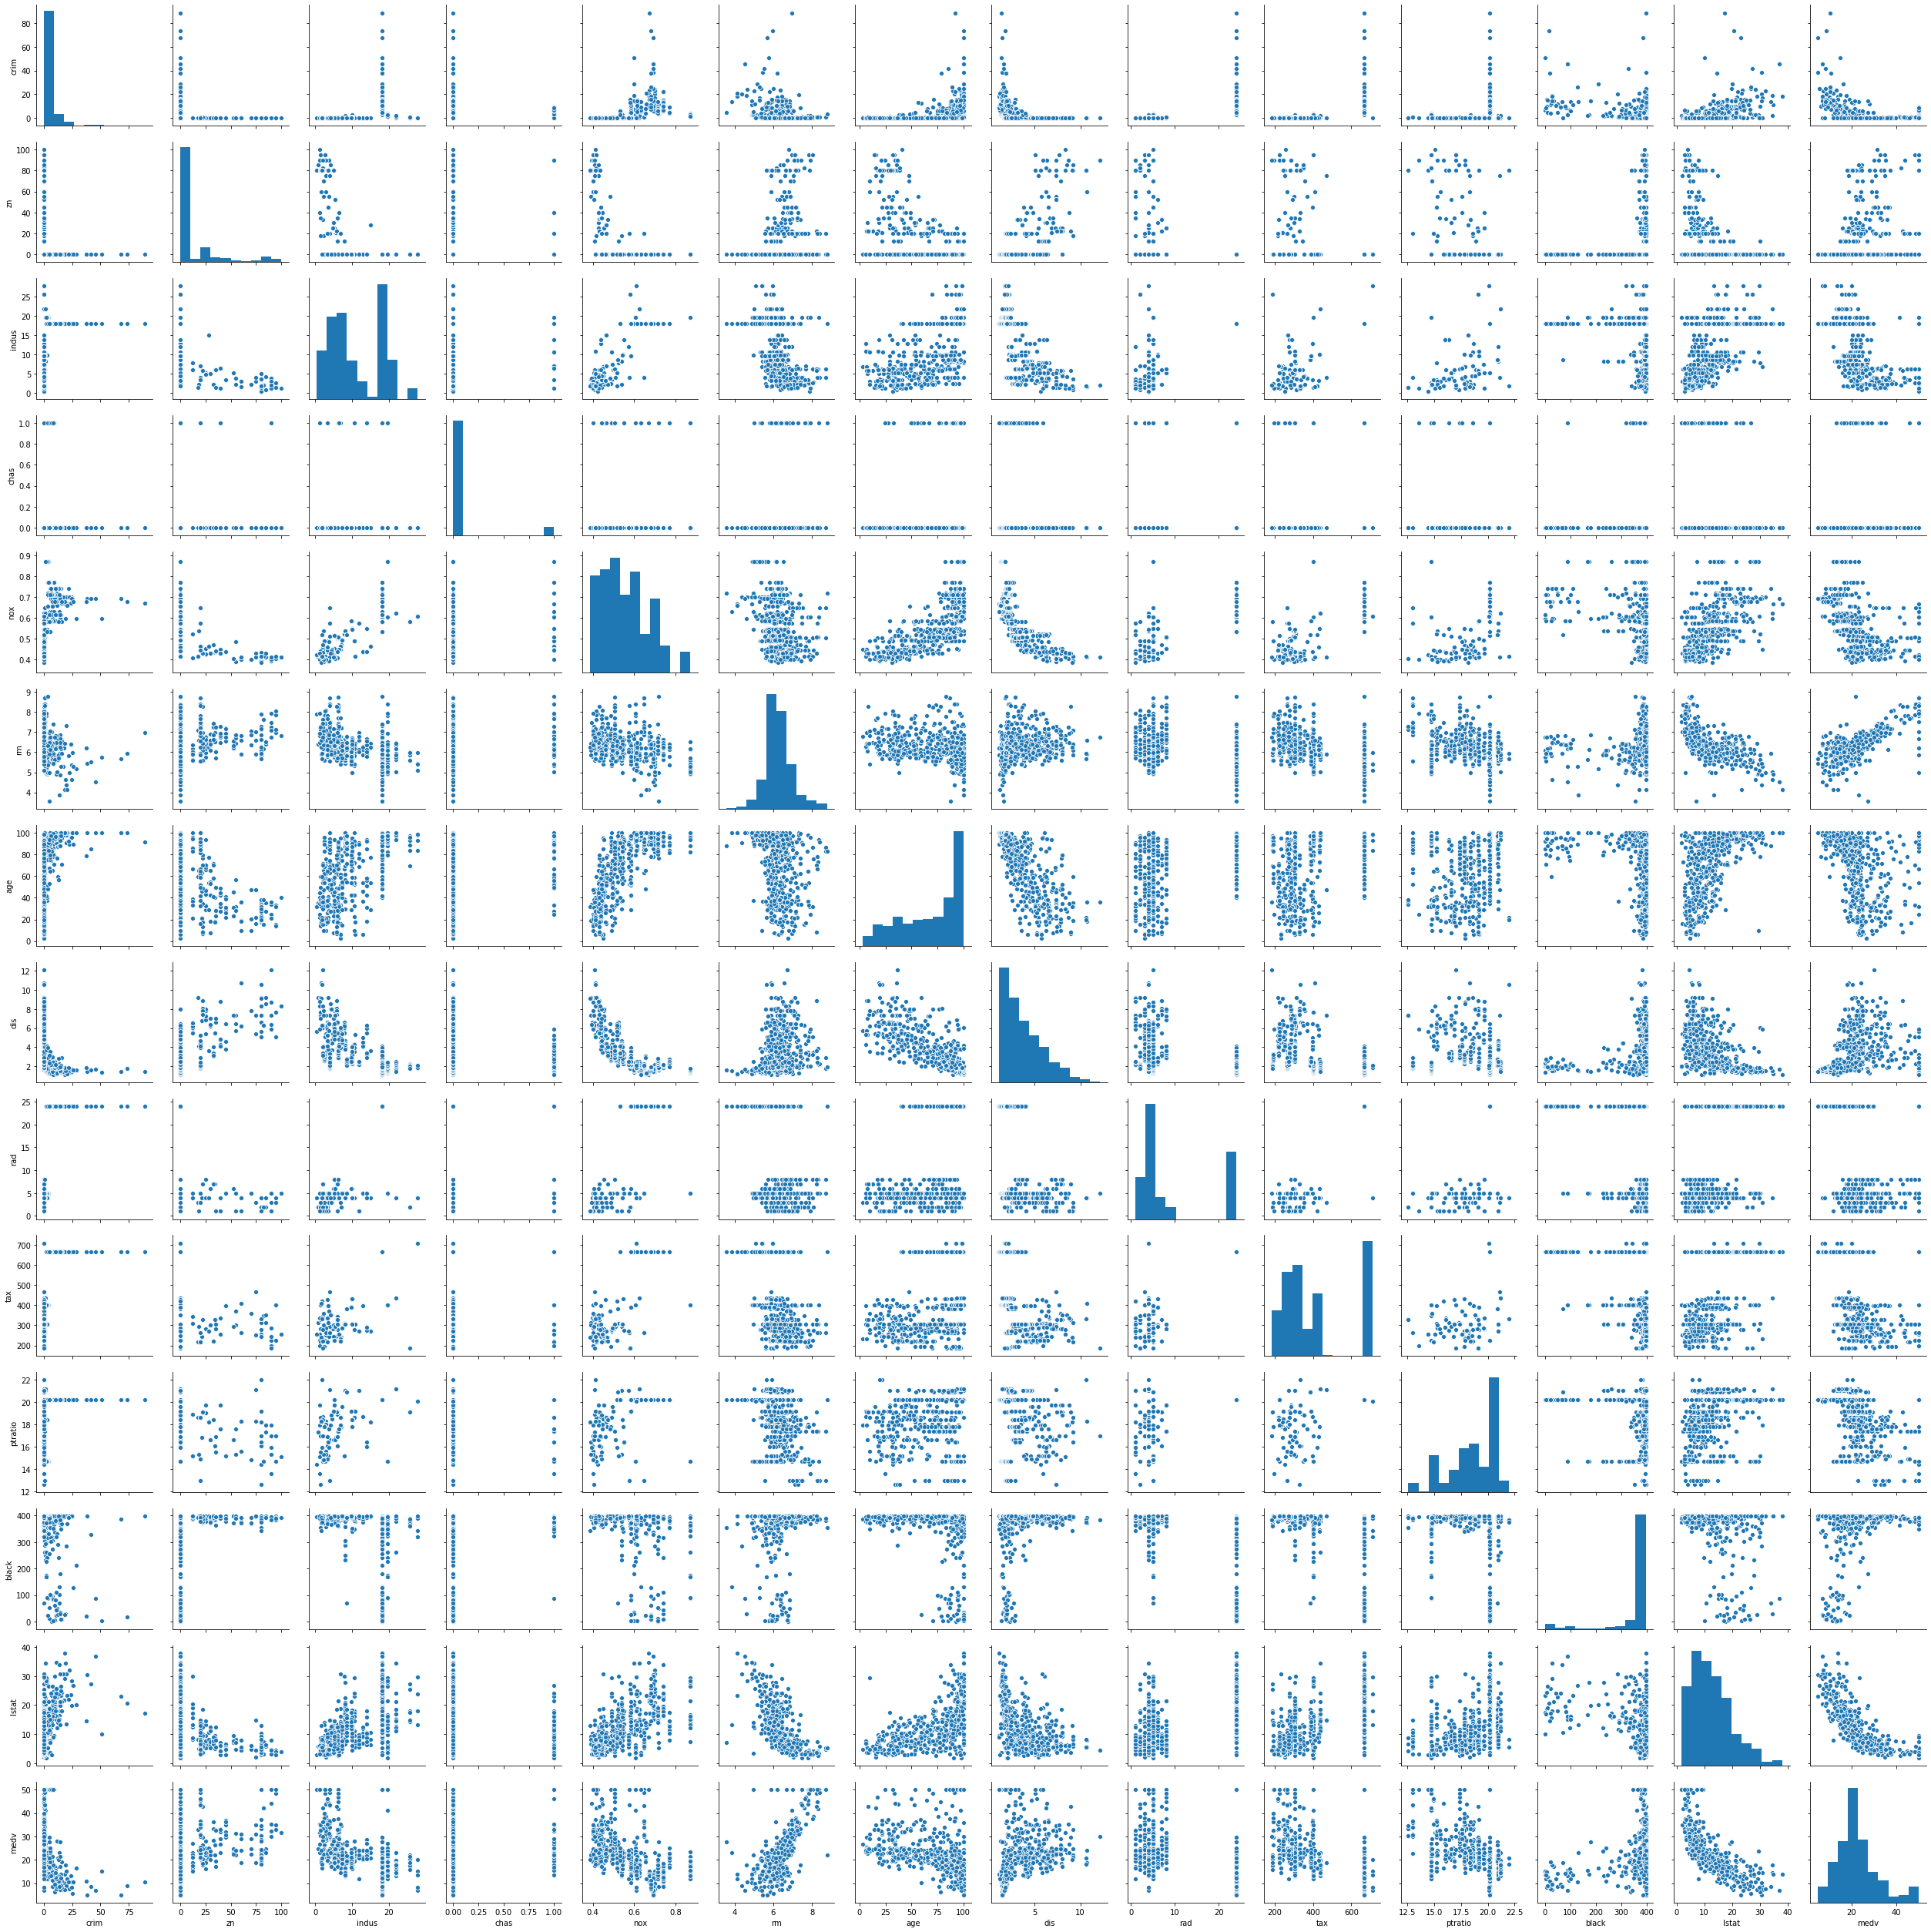

In [1105]:
sns.pairplot(df);

In [1106]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

> 10e: How many of the suburbs in this data set bound the Charles river?

In [1112]:
ma = df.chas > 0
print(f"{sum(ma)} suburbs are by the river")

35 suburbs are by the river


> 10f: What is the median pupil-teacher ratio among the towns in this data set?

In [1114]:
df.ptratio.describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

In [1115]:
df.ptratio.median()

19.05

> 10h: (h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [1125]:
for rm in [7, 8]:
    print(f"Number of suburbs with > {rm} rooms: {sum(df.rm > rm)}")

Number of suburbs with > 7 rooms: 64
Number of suburbs with > 8 rooms: 13


In [1131]:
ma = df.rm > 8
val = df[ma].medv.mean() / df.medv.mean()
print(f"Suburbs with > 8 rooms have {val:.2f} times the avg suburbs value")

Suburbs with > 8 rooms have 1.96 times the avg suburbs value
